# Introduction

Optimization algorithms adjust model parameters to minimize a loss function over a dataset. The way these algorithms handle data batches significantly affects their convergence behavior.

In this notebook, we'll:

- Implement **Gradient Descent (GD)**, **Stochastic Gradient Descent (SGD)**, and **Mini-batch Gradient Descent** using a linear regression model.
- Visualize their convergence paths and loss over iterations.
- Observe how each algorithm behaves differently due to data sampling.

# Synthetic Dataset

## Generate the Dataset

We'll create a simple linear relationship with some added noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(3)

# Generate 1000 data points
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Add bias term to X
X_b = np.c_[np.ones((1000, 1)), X]  # Add x0 = 1 to each instance

## Visualize the Dataset

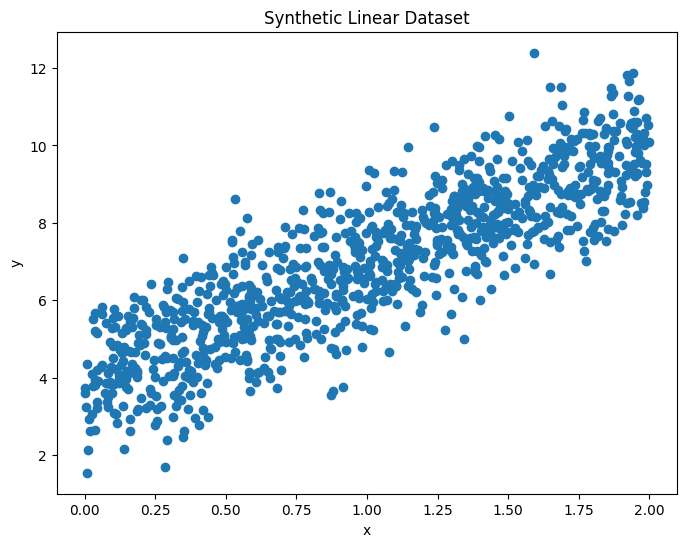

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Linear Dataset')
plt.show()

# Linear Regression Model

Our model predicts $\hat{y} = \theta_0 + \theta_1 x$, where $\theta$ are the parameters we need to optimize.

# Loss Function (Mean Squared Error)

The Mean Squared Error (MSE) loss function is defined as:

$$
J(\theta) = \frac{1}{2N} \sum_{i=1}^{N} (y^{(i)} - \theta^T x^{(i)})^2
$$

- $N$ is the number of data points.
- $x^{(i)}$ and $y^{(i)}$ are the input and output of the $i$-th data point.

## Define the Loss Function and its Gradient

In [3]:
def compute_cost(theta, X, y):
    N = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * N)) * np.sum((predictions - y) ** 2)
    return cost

def compute_gradient(theta, X, y):
    N = len(y)
    predictions = X.dot(theta)
    gradients = (1 / N) * X.T.dot(predictions - y)
    return gradients

# Implementing Optimization Algorithms

## Batch Gradient Descent

In [4]:
def gradient_descent(X, y, theta_init, learning_rate, num_iters):
    theta = theta_init.copy()
    cost_history = []
    theta_history = [theta.copy()]

    for i in range(num_iters):
        gradients = compute_gradient(theta, X, y)
        theta -= learning_rate * gradients
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history

## Stochastic Gradient Descent

In [6]:
def stochastic_gradient_descent(X, y, theta_init, learning_rate, num_iters):
    theta = theta_init.copy()
    cost_history = []
    theta_history = [theta.copy()]
    N = len(y)

    for i in range(num_iters):
        for j in range(N):
            rand_index = np.random.randint(0, N)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            cost = compute_cost(theta, X, y)
            cost_history.append(cost)
            theta_history.append(theta.copy())

    return theta, cost_history, theta_history

## Mini-batch Gradient Descent

In [7]:
def minibatch_gradient_descent(X, y, theta_init, learning_rate, num_iters, batch_size):
    theta = theta_init.copy()
    cost_history = []
    theta_history = [theta.copy()]
    N = len(y)

    for i in range(num_iters):
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, N, batch_size):
            xi = X_shuffled[j:j+batch_size]
            yi = y_shuffled[j:j+batch_size]
            gradients = (1 / batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            cost = compute_cost(theta, X, y)
            cost_history.append(cost)
            theta_history.append(theta.copy())

    return theta, cost_history, theta_history

# Visualization of Convergence Paths

## Initialize Parameters

In [5]:
theta_init = np.random.randn(2, 1)
learning_rate = 0.1
num_iters = 50
batch_size = 10

## Run the Algorithms

In [8]:
theta_gd, cost_history_gd, theta_history_gd = gradient_descent(X_b, y, theta_init, learning_rate, num_iters)
theta_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_b, y, theta_init, learning_rate, num_iters)
theta_mgd, cost_history_mgd, theta_history_mgd = minibatch_gradient_descent(X_b, y, theta_init, learning_rate, num_iters, batch_size)

## Plot the Loss over Iterations

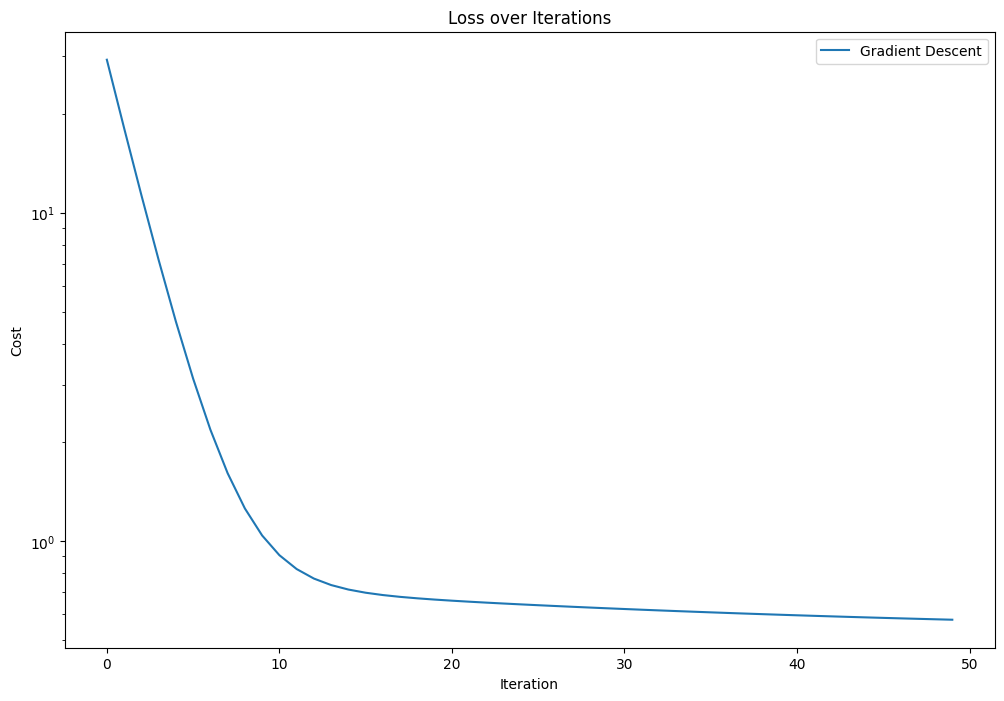

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_gd)), cost_history_gd, label='Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

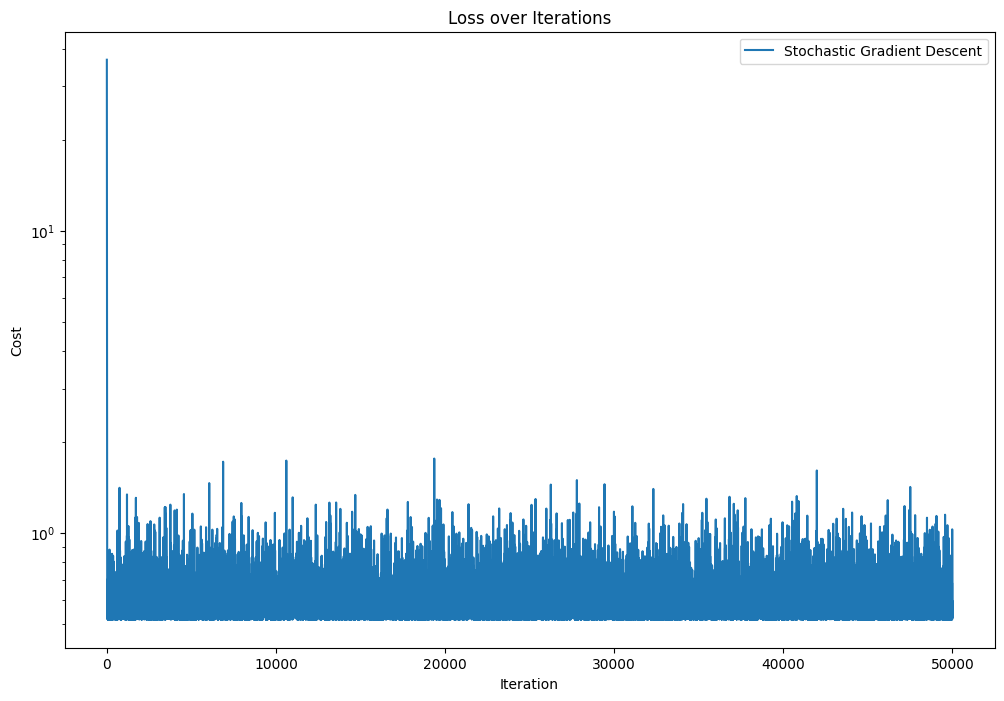

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

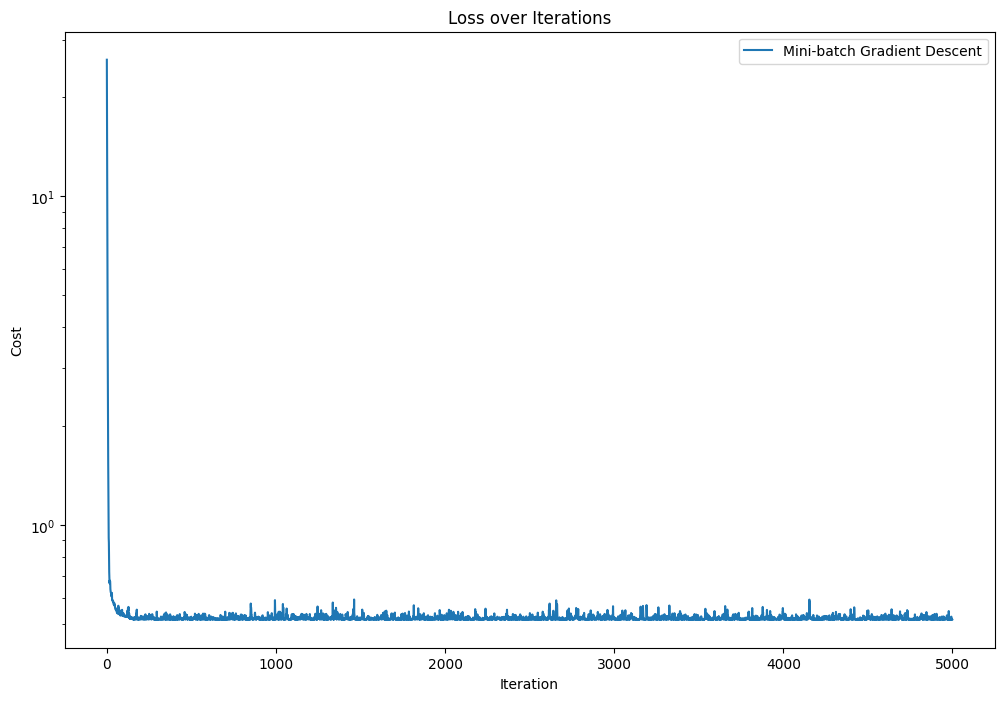

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(cost_history_mgd)), cost_history_mgd, label='Mini-batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Loss over Iterations')
plt.legend()
plt.show()

## Visualize Parameter Convergence

Since we have two parameters ($\theta_0$ and $\theta_1$), we can visualize how they converge.

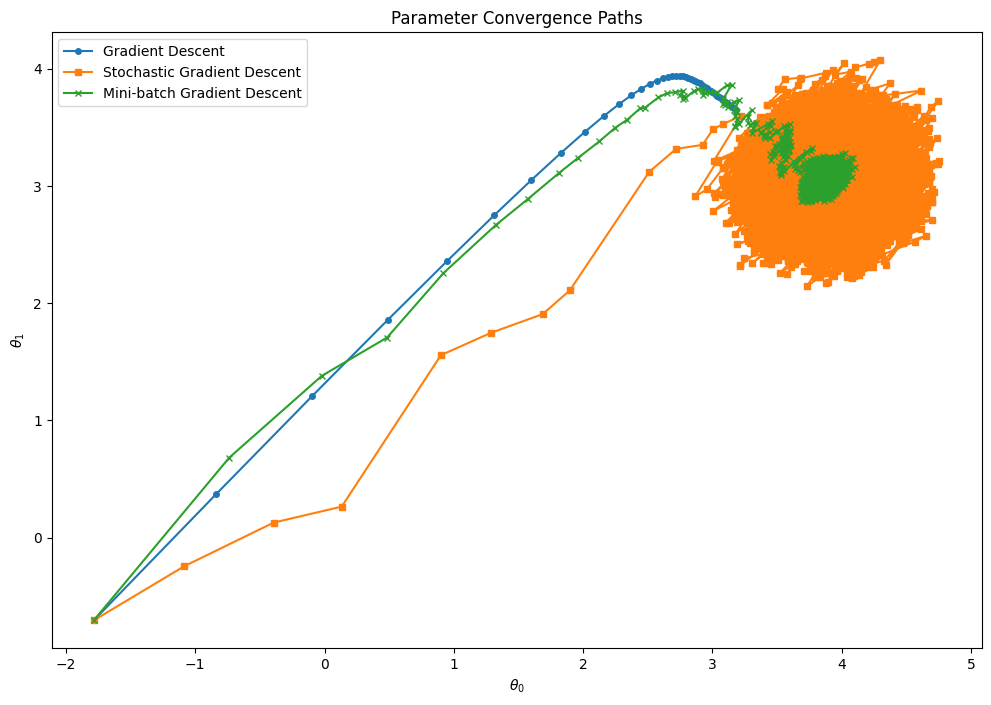

In [12]:
theta_history_gd = np.array(theta_history_gd)
theta_history_sgd = np.array(theta_history_sgd)
theta_history_mgd = np.array(theta_history_mgd)

plt.figure(figsize=(12, 8))
plt.plot(theta_history_gd[:, 0], theta_history_gd[:, 1], 'o-', label='Gradient Descent', markersize=4)
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 's-', label='Stochastic Gradient Descent', markersize=4)
plt.plot(theta_history_mgd[:, 0], theta_history_mgd[:, 1], 'x-', label='Mini-batch Gradient Descent', markersize=4)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Parameter Convergence Paths')
plt.legend()
plt.show()

### Explanation

- **Gradient Descent**: Shows a smooth convergence towards the optimal parameters.
- **Stochastic Gradient Descent**: Exhibits more fluctuations due to random sampling of data points.
- **Mini-batch Gradient Descent**: Fluctuations are less than SGD but more than GD.

## Visualizing the Contour Plot with Optimization Paths

### Compute the Cost Function Over a Grid

In [13]:
# Define ranges for theta0 and theta1
theta0_vals = np.linspace(-1, 5, 100)
theta1_vals = np.linspace(-1, 5, 100)

# Create a grid of theta0 and theta1 values
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Initialize the cost function values
J_vals = np.zeros(Theta0.shape)

# Compute the cost function at each point in the grid
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[Theta0[i, j]], [Theta1[i, j]]])
        J_vals[i, j] = compute_cost(t, X_b, y)

### Plot the Contour Plot and Overlay the Paths

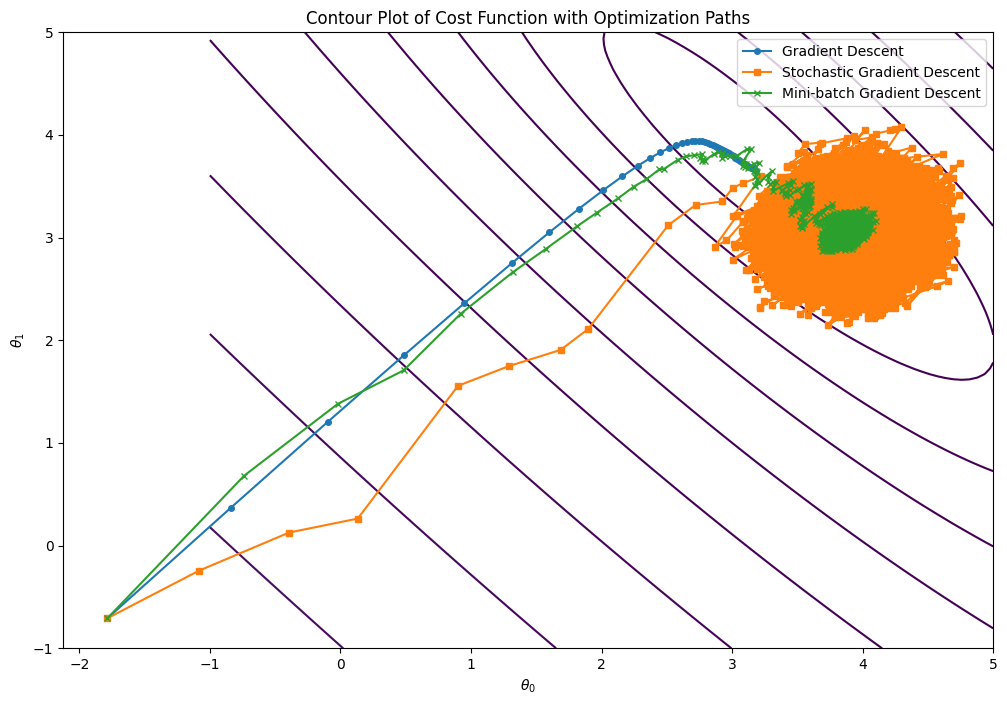

In [14]:
plt.figure(figsize=(12, 8))
# Transpose J_vals to match the orientation
plt.contour(Theta0, Theta1, J_vals.T, levels=np.logspace(-1, 3, 20), cmap='viridis')
# Plot the paths
plt.plot(theta_history_gd[:, 0], theta_history_gd[:, 1], 'o-', label='Gradient Descent', markersize=4)
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 's-', label='Stochastic Gradient Descent', markersize=4)
plt.plot(theta_history_mgd[:, 0], theta_history_mgd[:, 1], 'x-', label='Mini-batch Gradient Descent', markersize=4)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Contour Plot of Cost Function with Optimization Paths')
plt.legend()
plt.show()

#### Interpretation

- **Contour Lines**: Represent levels where the cost function $J(\theta_0, \theta_1)$ has the same value.
- **Optimization Paths**:
  - **Gradient Descent**: Follows a smooth path directly towards the minimum.
  - **Stochastic Gradient Descent**: Takes a more erratic path due to the randomness in data sampling.
  - **Mini-batch Gradient Descent**: Path is smoother than SGD but may still exhibit some fluctuations.

# Conclusion

By incorporating a dataset and a loss function that depends on data points, we can effectively demonstrate the differences between optimization algorithms:

- **Gradient Descent (GD)**:
  - Uses the entire dataset to compute gradients.
  - Converges smoothly but can be slow on large datasets.
- **Stochastic Gradient Descent (SGD)**:
  - Uses one data point at a time.
  - Converges faster per iteration but introduces noise, causing fluctuations.
- **Mini-batch Gradient Descent**:
  - Uses small batches of data.
  - Balances the convergence speed and stability.

## Try these
- **Experiment with Different Learning Rates**: Observe how the choice of learning rate affects convergence and stability.
- **Try Different Batch Sizes**: See how changing the batch size in Mini-batch GD influences the results.
- **Try to Implement Momentum or Adaptive Learning Rates**: Enhance the optimization algorithms to improve convergence.

**Note**: This notebook is a simplified illustration for educational purposes. In real-world deep learning tasks, the loss surfaces are much more complex, and the choice of optimization algorithm can significantly impact the training performance.